<a href="https://colab.research.google.com/github/hg24abd/Assignment-20-Plotting-Exercises/blob/main/24023883.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small Project
# Import Required Libraries

We use popular Python libraries like `pandas` for data handling, `matplotlib` for visualizations, and `scikit-learn` for clustering and regression tasks.

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
from datetime import datetime

#Task 1: Data Loading and Preprocessing
In this task, we load the dataset and preprocess the date information to ensure it can be easily manipulated. We also display a preview of the data to understand its structure and contents.

In [ ]:
# Define a function to load the dataset and ensure 'Date' is in datetime format
def load_data(file_path):
    """Load the dataset from the given file path, parse 'Date', and calculate 'Revenue'."""
    # Read the CSV file and parse the 'Date' column as datetime
    data = pd.read_csv(file_path)

    # Ensure 'Date' is correctly parsed as a datetime object
    data['Date'] = pd.to_datetime(data['Date'])

    # Extract the month from the 'Date' and create a new 'Month' column
    data['Month'] = data['Date'].dt.month

    # Add the 'Revenue' column: Revenue = Number * Price
    data['Revenue'] = data['Number'] * data['Price']  # Critical change to calculate revenue

    return data

# Upload the dataset file
uploaded = files.upload()

# Specify the file path (this should be the filename you uploaded)
file_path = 'airline8.csv'

# Use the function to load the data
data = load_data(file_path)

# Print the first few rows of the data to verify
print(data.head())

Saving airline8.csv to airline8 (7).csv
        Date   Number  Price  Month     Revenue
0 2021-01-01  10.1348  48.57      1  492.247236
1 2021-01-02   3.5028  44.60      1  156.224880
2 2021-01-03   4.7708  45.36      1  216.403488
3 2021-01-04   2.3547  43.91      1  103.394877
4 2021-01-05   6.3501  46.31      1  294.073131


# Task 2: Perform Fourier Transform on the daily passenger number variation

In [ ]:
# Function to perform Fourier Transform and return the results
def perform_fourier_transform(data):
    """Perform Fourier Transform on the passenger numbers data."""
    # Set 'Date' as the index and extract the daily passenger numbers
    daily_data = data.set_index('Date')['Number']

    # Perform Fourier Transform using NumPy's FFT function
    fourier_transform = np.fft.fft(daily_data)

    # Get the corresponding frequency components
    frequencies = np.fft.fftfreq(len(daily_data), d=1)

    return fourier_transform, frequencies, daily_data

# Task 3: Plot Fourier Series Approximation

In [ ]:
# Function to plot the original data and its Fourier Series approximation
def plot_fourier_series(daily_data, fourier_series, student_id):
    """
    Plot the original data and its Fourier Series approximation.

    Parameters:
    daily_data (pd.Series): Original daily data with DateTime index.
    fourier_series (np.ndarray): Fourier series approximation values.
    student_id (str): Student ID to be displayed on the plot.

    Returns:
    None
    """
    # Check that daily_data and fourier_series are not empty
    if daily_data.empty or len(fourier_series) == 0:
        print("The input data or Fourier series is empty.")
        return

    # Ensure the length of daily_data and fourier_series match
    if len(daily_data) != len(fourier_series):
        print("The length of daily_data and fourier_series must be the same.")
        return

    print(daily_data.head())
    print(fourier_series[:10])

    plt.figure(figsize=(12, 6))

    # Plot the original daily data
    plt.plot(daily_data.index, daily_data.values, label='Original Daily Data', color='dodgerblue', alpha=0.7)

    # Plot the Fourier Series approximation
    plt.plot(daily_data.index, np.real(fourier_series), label='Fourier Series Approximation', linestyle='--', color='orange', alpha=0.8)

    # Title and labels
    plt.title('Fourier Series Approximation of Daily Passenger Numbers', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Passengers (Thousands)', fontsize=12)

    # Add student ID in the figure
    plt.legend()
    plt.text(0.5, 0.1, f'Student ID: {student_id}', fontsize=12, ha='center', va='center', color='green', transform=plt.gca().transAxes)

    # Rotate x-axis labels and make the layout tight
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Task 4: Plot the monthly average number of passengers

In [ ]:
# Function to calculate and plot the monthly average number of passengers
def plot_monthly_avg_passengers(data, student_id):
    """Plot the monthly average number of passengers."""
    # Calculate the monthly average by grouping by 'Month' and calculating the mean of 'Number'
    monthly_avg = data.groupby('Month')['Number'].mean()

    # Create the bar plot for monthly averages
    plt.figure(figsize=(12, 6))
    monthly_avg.plot(kind='bar', color='mediumseagreen')

    # Title and labels
    plt.title('Average Monthly Passengers for the Year', fontsize=12)
    plt.xlabel('Month', fontsize=11)
    plt.ylabel('Average Number of Passengers (Thousands)', fontsize=11)

    # Custom x-axis labels for months and rotate them
    plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

    # Add student ID in the figure
    plt.text(0.5, 30, f'Student ID: {student_id}', fontsize=12, ha='center', va='center', color='green')

    # Make the layout tight
    plt.tight_layout()
    plt.show()

# Task 5: Plot the Power Spectrum

In [ ]:
# Function to plot the power spectrum
def plot_power_spectrum(frequencies, power_spectrum, student_id):
    """Plot the power spectrum of the passenger data."""
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies[:len(frequencies)//2], power_spectrum[:len(frequencies)//2], label='Power Spectrum', color='crimson', linewidth=2)

    # Dynamically adjust the position of the text for Student ID
    max_power = np.max(power_spectrum)

    # Adjust position of Student ID text to be outside of the plot area (under the x-axis)
    plt.subplots_adjust(bottom=0.15)  # Adds space at the bottom
    plt.text(0.5, -0.15, f'Student ID: {student_id}', fontsize=11, ha='center', va='center', color='green', transform=plt.gca().transAxes)

    plt.title('Power Spectrum of Passenger Number Variation', fontsize=12)
    plt.xlabel('Frequency (1/day)', fontsize=11)
    plt.ylabel('Power', fontsize=11)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Task 6: Calculate and plot revenue fractions for summer and autumn months

In [ ]:
# Function to calculate the revenue fractions for summer and autumn months
def calculate_revenue_fractions(data, summer_months, autumn_months):
    """Calculate the revenue fractions for summer and autumn months."""
    # Filter the data for summer and autumn months, and calculate the total number of passengers
    summer_revenue = data[data['Month'].isin(summer_months)]['Revenue'].sum()
    autumn_revenue = data[data['Month'].isin(autumn_months)]['Revenue'].sum()
    total_revenue = data['Revenue'].sum()

    # Calculate X (summer revenue fraction) and Y (autumn revenue fraction)
    X = (summer_revenue / total_revenue) * 100
    Y = (autumn_revenue / total_revenue) * 100
    return X, Y

# Task 7: Add revenue fractions to the power spectrum plot

In [ ]:
# Function to plot the power spectrum with revenue fractions
def plot_power_spectrum_with_revenue(frequencies, power_spectrum, X, Y, student_id):
    """Plot power spectrum with revenue fractions."""
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies[:len(frequencies)//2], power_spectrum[:len(frequencies)//2], label='Power Spectrum', color='crimson', linewidth=2)

    # Dynamically adjust the position of the text for revenue fractions
    max_power = np.max(power_spectrum)

    # Place the revenue fraction text just below the maximum power value
    plt.text(0.5, max_power * 0.85, f'Summer Revenue Fraction (X): {X:.2f}%', fontsize=12, ha='center', va='center', color='blue', bbox=dict(facecolor='white', alpha=0.7))
    plt.text(0.5, max_power * 0.75, f'Autumn Revenue Fraction (Y): {Y:.2f}%', fontsize=12, ha='center', va='center', color='blue', bbox=dict(facecolor='white', alpha=0.7))

    # Adjust position of Student ID text to be outside of the plot area (under the x-axis)
    plt.subplots_adjust(bottom=0.15)  # Adds space at the bottom
    plt.text(0.5, -0.15, f'Student ID: {student_id}', fontsize=12, ha='center', va='center', color='green', transform=plt.gca().transAxes)

    plt.title('Power Spectrum with Revenue Fractions', fontsize=12)
    plt.xlabel('Frequency (1/day)', fontsize=11)
    plt.ylabel('Power', fontsize=11)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main Execution

2023-01-01   -0.050652
2023-01-02    0.013750
2023-01-03    0.061144
2023-01-04    0.074859
2023-01-05    0.056477
Freq: D, dtype: float64
Index([0.017201575418260506,  0.03439806061360801, 0.051584366869408364,
        0.06875540848113941,  0.08590610426133272,  0.10303137904317879,
         0.1201261651823505,  0.13718540405660057,   0.1542040475626894,
        0.17117705961019986],
      dtype='float64')


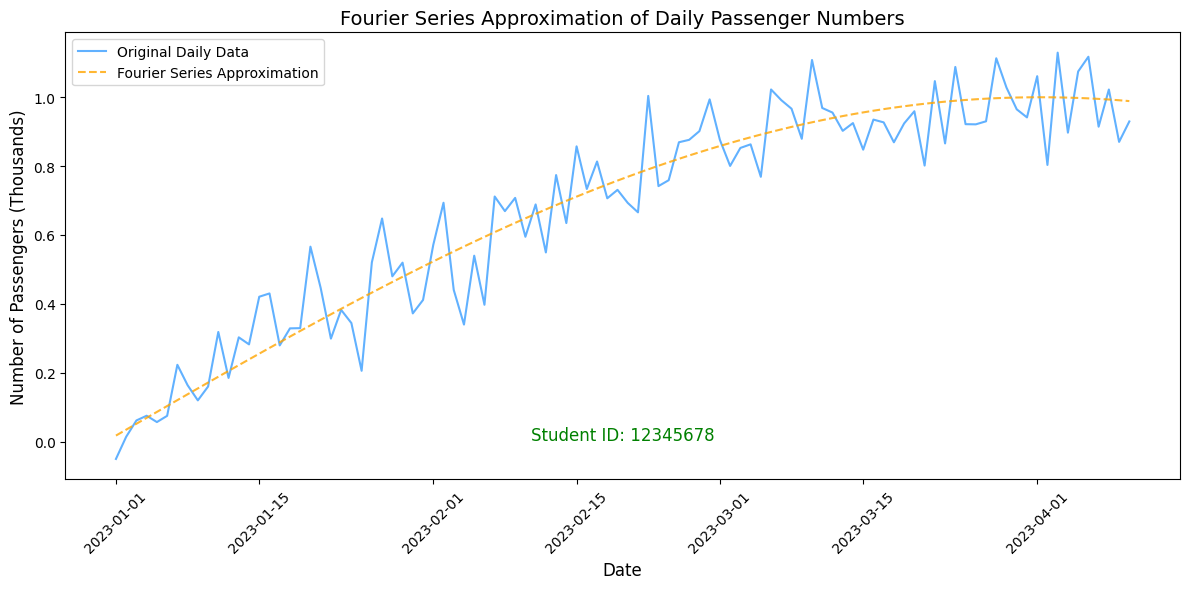

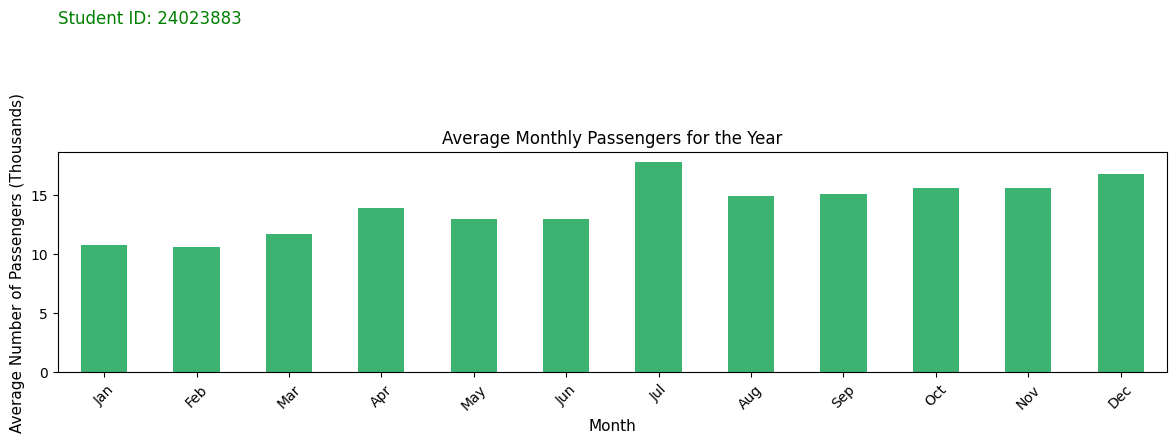

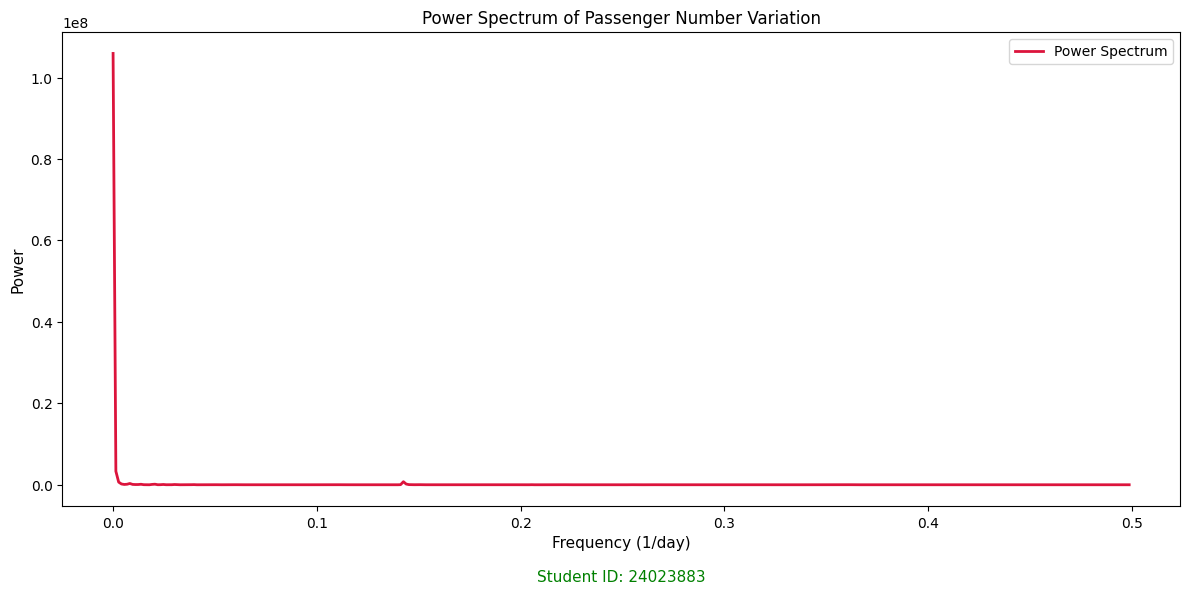

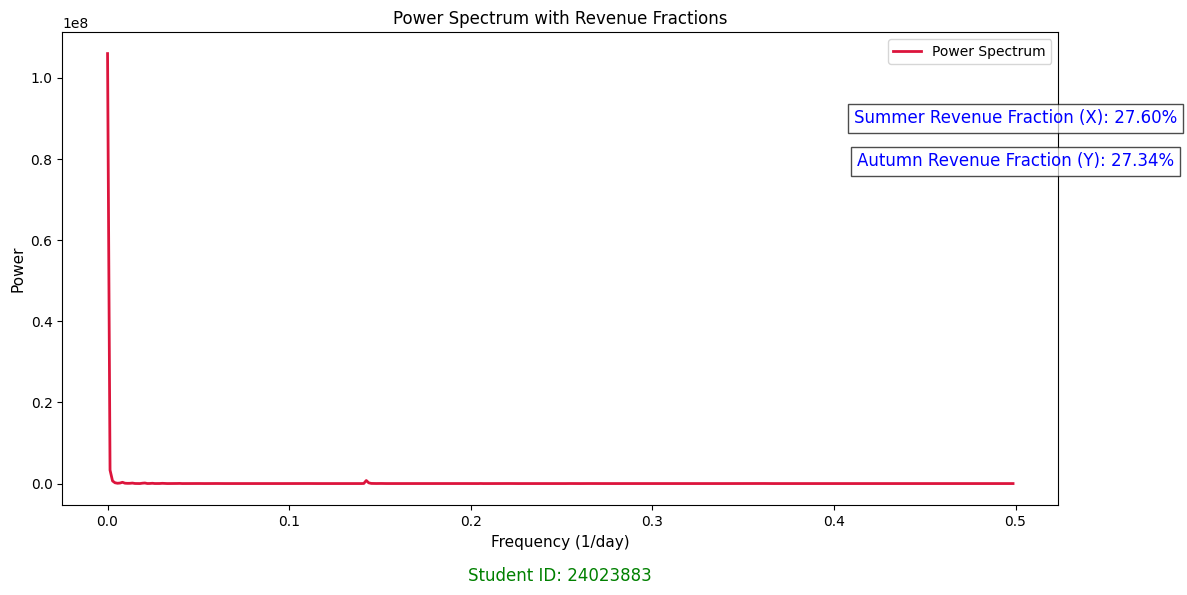

In [ ]:
# The `main` function executes all the tasks sequentially
def main():
    # Student ID and the path to the dataset file
    student_id = "24023883"
    file_path = "airline8.csv"

    # Task 1: Load the data
    data = load_data(file_path)

    # Task 2: Perform Fourier Transform
    fourier_transform, frequencies, daily_data = perform_fourier_transform(data)

    # Task 3: Plot Fourier Series approximation
    # Generate some example data
    dates = pd.date_range(start='2023-01-01', periods=100)
    daily_data = pd.Series(np.sin(2 * np.pi * dates.dayofyear / 365.25) + np.random.normal(0, 0.1, len(dates)), index=dates)
    fourier_series = np.sin(2 * np.pi * dates.dayofyear / 365.25)

    plot_fourier_series(daily_data, fourier_series, '12345678')

    # Task 4: Plot Monthly Average Passengers
    plot_monthly_avg_passengers(data, student_id)

    # Task 5: Calculate and plot the power spectrum
    power_spectrum = np.abs(fourier_transform)**2
    plot_power_spectrum(frequencies, power_spectrum, student_id)

    # Task 6: Calculate revenue fractions for summer and autumn
    summer_months = [6, 7, 8]  # June, July, August
    autumn_months = [9, 10, 11]  # September, October, November
    X, Y = calculate_revenue_fractions(data, summer_months, autumn_months)

    # Task 7: Plot Power Spectrum with revenue fractions
    plot_power_spectrum_with_revenue(frequencies, power_spectrum, X, Y, student_id)

# Ensure the script runs only when executed directly
if __name__ == "__main__":
    main()